In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from costs import *
from grid_search import *
from gradient_descent import *
import stochastic_gradient_descent
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    a = tx.T.dot(tx)
    b = tx.T.dot(y)
    
    w = np.linalg.solve(a,b)
    loss = compute_loss(y,tx,w)
    return w,loss

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    w_LS, loss_LS = least_squares(y,tx)
    w_GS, loss_GS = grid_search(y,tx)
    w_GD, loss_GD = gradient_descent(y,tx, [0, 0], 50, 0.7)
    
    return [w_LS, w_GS, loss_LS, loss_GS]


Test it here

In [4]:
test_your_least_squares()

Gradient Descent(0/49): loss=2792.2367127591674, w0=51.30574540147352, w1=9.435798704492393
Gradient Descent(1/49): loss=265.302462108962, w0=66.69746902191565, w1=12.266538315840034
Gradient Descent(2/49): loss=37.87837955044161, w0=71.31498610804833, w1=13.115760199244338
Gradient Descent(3/49): loss=17.410212120174496, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=15.568077051450455, w0=73.11581777164008, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265295, w0=73.24049073296567, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136332, w1=13.476764421879517
Gradient Descent(7/49): loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638305, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=15.3858879656522, w0=73.29379216412119, w1=13.47

[array([ 73.293922  ,  13.47971243]),
 [71.428571428571416, 15.306122448979579],
 15.3858878688294,
 18.793541019523236]

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [36]:
# load dataset
x, y = load_data()
tx = np.c_[np.ones(y.shape[0]), x]
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))
print("shape of tx {}".format(tx.shape))

shape of x (50,)
shape of y (50,)
shape of tx (50, 2)
0
1


In [122]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    if(degree < 1):
        return x
    #print(x.shape)
    #print(x)
    #print(x**0)
    #new_x = np.expand_dims(x, axis=x.ndim) # add an extradimension
    #print(new_x)
    #print(new_x.shape)
    #print(np.concatenate([np.array(x.shape), [degree+1]]))
    new_x = np.zeros(np.concatenate([np.array(x.shape), [degree+1]]))
    print(x.shape)
    print(new_x.shape)
    new_x[..., 0] = x**0 # add zeros (for degree 0)
    new_x[..., 1] = x**1 # add zeros (for degree 0)
    #print(x)
    #print(new_x)
    #print(new_x[:,:,1])

    if degree <= 1:
        return new_x
    else:  
        for i in range(degree-1):
            cur_degree = i+2
            #print(cur_degree)
            #print(new_x)
            #print(x**cur_degree)
            new_x[...,cur_degree] = x**cur_degree
            #tx = np.vstack([tx, tx[1]**cur_degree])#np.c_[tx, tx[1]**cur_degree]

    return new_x
        
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************



In [123]:
#my_x = np.array([1.0, 2.0]) #1D vector test
my_x = np.array([[1.0, 2.0], [2.0, 3.0]]) #2D vector test
res = build_poly(my_x, 3)
res[...,3]

(2, 2)
(2, 2, 4)


array([[  1.,   8.],
       [  8.,  27.]])

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [210]:
from costs import compute_mse
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        phi = build_poly(x, degree)  # form the data to do polynomial regression.: TODO
        # least square and calculate RMSE: TODO
        weights, loss_LS = least_squares(y, phi)
        #print(weights)
        #print(phi)
        rmse = np.sqrt(2.0*compute_mse(y,phi,weights))
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737506
Processing 3th experiment, degree=7, rmse=0.24965870360907372
Processing 4th experiment, degree=12, rmse=0.24328247481248672


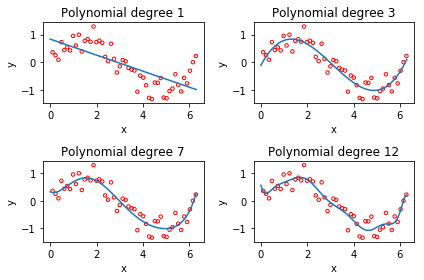

In [211]:
polynomial_regression()

In [171]:
a = np.array([1,2])
print(np.append(a,[3]))
print(np.random.randint(0, 2, 2))

[1 2 3]
[1 1]


In [194]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    y_copy = np.copy(y)
    x_copy = np.copy(x)
    
    x_train = np.array([])
    y_train = np.array([])
    
    N = y.shape[0]
    N_sel = 0.0
    
    while(N_sel/N < ratio):
        #print(N_sel/N)
        idx = np.random.randint(0, N-N_sel, 1)
        x_train = np.append(x_train, x_copy[idx])
        y_train = np.append(y_train, y_copy[idx])
        
        x_copy = np.delete(x_copy, idx,axis=0)
        y_copy = np.delete(y_copy, idx,axis=0)
        N_sel +=1.0
    
    x_test = x_copy
    y_test = y_copy
    
    return x_train, x_test, y_train, y_test


In [195]:
my_x = np.array([0, 1, 2, 3, 4])
my_y = np.array([0, 1, 2, 3, 4])
ratio = 0.8

split_data(my_x, my_y, ratio)

(array([ 3.,  0.,  1.,  4.]),
 array([2]),
 array([ 3.,  0.,  1.,  4.]),
 array([2]))

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

Then, test your `split_data` function below.

In [207]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # split the data, and return train and test data: TODO
    x_train, x_test, y_train, y_test = split_data(x, y, ratio)

    # form train and test data with polynomial basis function: TODO
    phi_train = build_poly(x_train, degree)
    phi_test = build_poly(x_test, degree)
    
    # calcualte weight through least square.: TODO
    w,loss = least_squares(y_train, phi_train)

    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    rmse_tr = np.sqrt(2.0*compute_mse(y_train,phi_train,w))
    rmse_te = np.sqrt(2.0*compute_mse(y_test,phi_test,w))
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [213]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.467, Testing RMSE=0.545
proportion=0.9, degree=3, Training RMSE=0.242, Testing RMSE=0.405
proportion=0.9, degree=7, Training RMSE=0.229, Testing RMSE=0.428
proportion=0.9, degree=12, Training RMSE=0.239, Testing RMSE=0.431
proportion=0.5, degree=1, Training RMSE=0.533, Testing RMSE=0.458
proportion=0.5, degree=3, Training RMSE=0.257, Testing RMSE=0.304
proportion=0.5, degree=7, Training RMSE=0.216, Testing RMSE=0.364
proportion=0.5, degree=12, Training RMSE=0.195, Testing RMSE=0.390
proportion=0.1, degree=1, Training RMSE=0.587, Testing RMSE=0.538
proportion=0.1, degree=3, Training RMSE=0.004, Testing RMSE=0.551
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=0.522
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=0.508


# 3 Ridge Regression
Please fill in the function below.

In [255]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    lambdap = lambda_ * 2 * y.shape[0]
    a = tx.T.dot(tx) + lambdap*np.eye(tx.shape[1])
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)


In [256]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    
    # split the data, and return train and test data
    x_train, x_test, y_train, y_test = split_data(x, y, ratio, seed)
    
    # form train and test data with polynomial basis function
    phi_train = build_poly(x_train, degree)
    phi_test = build_poly(x_test, degree)
    
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ridge regression with a given lambda
        w = ridge_regression(y_train, phi_train, lambda_)
        rmse_tr.append(np.sqrt(2.0*compute_mse(y_train,phi_train,w)))
        rmse_te.append(np.sqrt(2.0*compute_mse(y_test,phi_test,w)))

        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_ ,tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.218, Testing RMSE=0.299
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.220, Testing RMSE=0.295
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.221, Testing RMSE=0.292
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.223, Testing RMSE=0.290
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.224, Testing RMSE=0.289
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.224, Testing RMSE=0.288
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.225, Testing RMSE=0.288
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.225, Testing RMSE=0.288
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.226, Testing RMSE=0.290
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.227, Testing RMSE=0.294
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.231, Testing RMSE=0.306
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.242, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.193, 

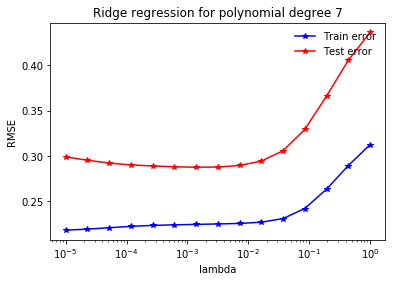

In [257]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)